### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [83]:
data = pd.read_csv('data/coupons.csv')

In [84]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Some column labels are mispelled- "passanger":

In [98]:
data = data.rename(columns={'passanger': 'passenger'})

Check for empty data, which columns they populate, and how significantly these missing values impact analysis:

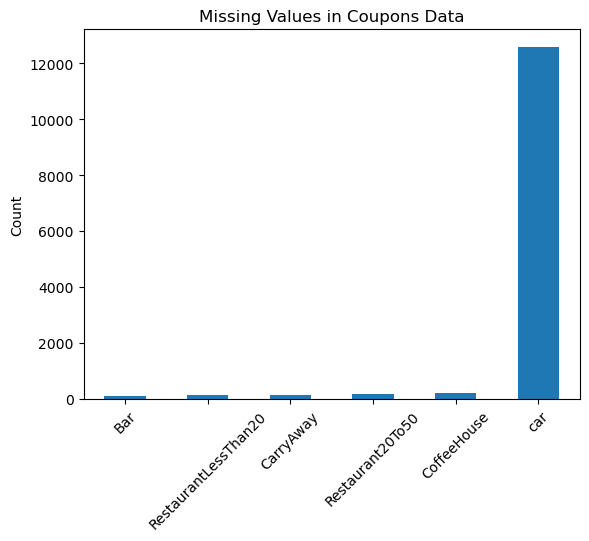

In [86]:
missing = data.isnull().sum().sort_values()
missing[missing > 0].plot(kind='bar', rot=45)
plt.title('Missing Values in Coupons Data')
plt.ylabel('Count')
plt.savefig('images/missing_plot.png', bbox_inches='tight')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

After investigation, the only car data included 'Scooter and motorcycle' and 'crossover', at 26 rows only this is not a good stastical basis to draw conclusions

In [87]:
data[~data['car'].isnull()][['car']].head(26)

,car
1237,Scooter and motorcycle
1238,Scooter and motorcycle
1239,Scooter and motorcycle
1240,Scooter and motorcycle
1241,Scooter and motorcycle
1242,Scooter and motorcycle
1243,Scooter and motorcycle
1244,Scooter and motorcycle
1245,Scooter and motorcycle
1246,Scooter and motorcycle


In [88]:
data = data.drop('car', axis=1)

Multiple columns are stored as strings, not numeric values and therefore need to be converted prior to conducting meaningful analysis. Replace or type modify these columns as necessary for analysis, based on need.

In [89]:
data['age'] = data['age'].str.replace('50plus', '55')
data['age'] = data['age'].str.replace('below21', '18')
data['age'] = pd.to_numeric(data['age']).astype('Int64')

4. What proportion of the total observations chose to accept the coupon?

In [90]:
acceptedrate = data['Y'].mean() * 100
print(f"Proportion of users who accepted the coupon: {acceptedrate:.2f}%")

Proportion of users who accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

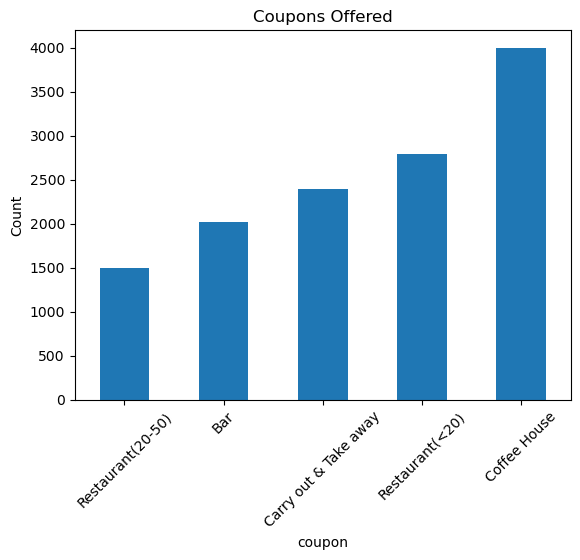

In [91]:
data['coupon'].value_counts().sort_values().plot(kind='bar', rot=45)
plt.title('Coupons Offered')
plt.ylabel('Count')
plt.savefig('images/coupons_offered.png', bbox_inches='tight')
plt.show()

6. Use a histogram to visualize the temperature column.

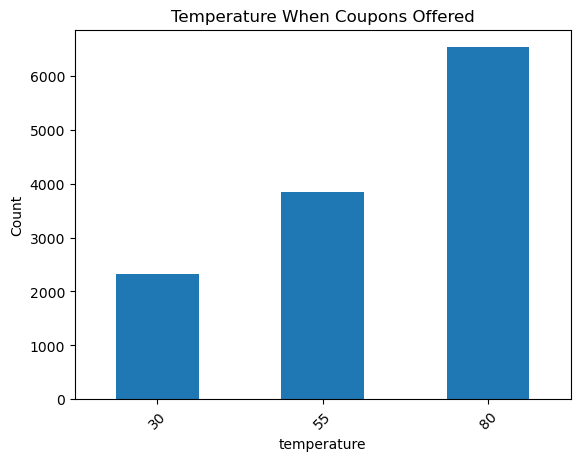

In [92]:
data['temperature'].value_counts().sort_values().plot(kind='bar', rot=45)
plt.title('Temperature When Coupons Offered')
plt.ylabel('Count')
plt.savefig('images/temperatures.png', bbox_inches='tight')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [93]:
bar_data = data[data['coupon']=='Bar']

2. What proportion of bar coupons were accepted?


In [94]:
bar_accepted_rate = bar_data['Y'].mean() * 100
print(type(bar_accepted_rate))
print(f"Proportion of users who accepted the coupon: {bar_accepted_rate:.2f}%")

<class 'numpy.float64'>
Proportion of users who accepted the coupon: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [95]:
bar_visit_categories = bar_data['Bar'].unique()
three_few_categories = ['never', 'less1', '1~3']
three_more_categories = ['gt8', '4~8']
bar_accepted_rate_3few = bar_data[bar_data['Bar'].isin(three_few_categories)]['Y'].mean() * 100
bar_accepted_rate_3more = bar_data[bar_data['Bar'].isin(three_more_categories)]['Y'].mean() * 100
print(f"Proportion of coupon acceptance by users who visit the bar 3 or fewer times: {bar_accepted_rate_3few:.2f}%")
print(f"Proportion of coupon acceptance by users who visit the bar 3 or more times: {bar_accepted_rate_3more:.2f}%")

Proportion of coupon acceptance by users who visit the bar 3 or fewer times: 37.06%
Proportion of coupon acceptance by users who visit the bar 3 or more times: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [129]:
one_few_categories = ['never', 'less1']
one_more_categories = ['gt8', '4~8', '1~3']
target_group_mean = data[(data['Bar'].isin(one_more_categories)) & (data['age']>25)]['Y'].mean() * 100
all_else_mean = data[(data['Bar'].isin(one_few_categories)) | (data['age']<25)]['Y'].mean() * 100
print(f"Proportion of coupon acceptance by target users (Bar visit >1 per month and over 25): {target_group_mean:.2f}%")
print(f"Proportion of coupon acceptance by all other users: {all_else_mean:.2f}%")

Proportion of coupon acceptance by target users (Bar visit >1 per month and over 25): 62.15%
Proportion of coupon acceptance by all other users: 55.40%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [130]:
non_kid_pass = ['Friend(s)', 'Partner']
target_group_mean2 = data[(data['Bar'].isin(one_more_categories)) & (data['passenger'].isin(non_kid_pass)) & (~(data['occupation']=='Farming Fishing & Forestry'))]['Y'].mean() * 100
all_else_mean2 = data[(data['Bar'].isin(one_few_categories)) | (~data['passenger'].isin(non_kid_pass)) | (data['occupation']=='Farming Fishing & Forestry')]['Y'].mean() * 100
print(f"Target users coupon acceptance rate (Bar visit >1 per month, non child passenger, and not working Farming Fishing & Forestry): {target_group_mean2:.2f}%")
print(f"All other users coupon acceptance rate: {all_else_mean2:.2f}%")

Target users coupon acceptance rate (Bar visit >1 per month, non child passenger, and not working Farming Fishing & Forestry): 69.02%
All other users coupon acceptance rate: 55.29%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [138]:
one_few_categories = ['never', 'less1']
one_more_categories = ['gt8', '4~8', '1~3']
non_kid_pass = ['Friend(s)', 'Partner']

more_1_bar = data['Bar'].isin(one_more_categories)
non_kid_pass = data['passenger'].isin(non_kid_pass)
not_widowed = data['maritalStatus']!='Widowed'
under_30 = data['age']<30
inc_under_50K = data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])
cheap_rest_over4 = data['RestaurantLessThan20'].isin(['4~8', 'gt8'])

target_mask = (more_1_bar & non_kid_pass & not_widowed) | (more_1_bar & under_30) | (cheap_rest_over4 & inc_under_50K)
target_group_mean3 = data[target_mask]['Y'].mean() * 100
all_else_mean3 = data[~target_mask]['Y'].mean() * 100

print(f"Target users coupon acceptance rate: {target_group_mean3:.2f}%")
print(f"All other users coupon acceptance rate: {all_else_mean3:.2f}%")

tgt_group1_mean = data[(more_1_bar & non_kid_pass & not_widowed)]['Y'].mean() * 100
tgt_group2_mean = data[(more_1_bar & under_30)]['Y'].mean() * 100
tgt_group3_mean = data[(cheap_rest_over4 & inc_under_50K)]['Y'].mean() * 100

print(f"Group 1: {tgt_group1_mean:.2f}%, Group 2: {tgt_group2_mean:.2f}%, Group 3: {tgt_group3_mean:.2f}%")

Target users coupon acceptance rate: 61.32%
All other users coupon acceptance rate: 54.46%
Group 1: 69.02%, Group 2: 62.81%, Group 3: 60.07%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these findings, it is apparent that drivers who already visit a bar at least once a month and that have a non child passenger are the most likely to accept a coupon for the bar. The set of conditions, captured by the first group above, are the largest factor driving the overall increase in coupon acceptance amongst the target group. Additionally, the second and third group are also more likely to accept a bar coupon but at a lesser rate.

A good overall predictor of bar coupon acceptance is how frequently the driver visited a bar per month. In my analsis, bar visits per month was directly correlated to bar coupon acceptance rate.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [154]:
coffee_data = data[data['coupon']=='Coffee House']
coffee_accepted_rate = coffee_data['Y'].mean() * 100
print(f"Users who accepted the coffee house coupon: {coffee_accepted_rate:.2f}%")

Users who accepted the coffee house coupon: 49.92%


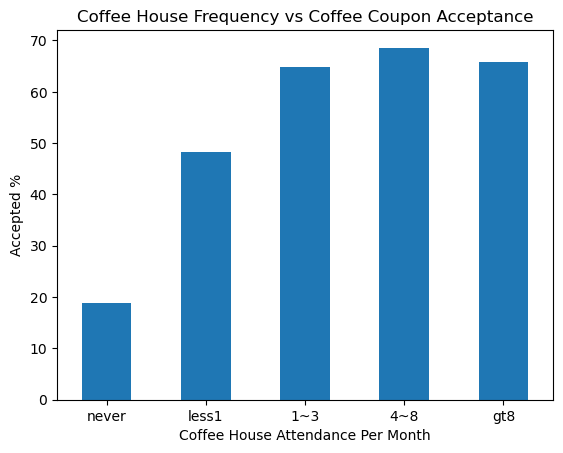

In [215]:
order = [ 'never', 'less1', '1~3', '4~8', 'gt8' ]
coffee_data.groupby('CoffeeHouse')['Y'].mean().mul(100).reindex(order).plot(kind='bar', rot=0)
plt.title('Coffee House Frequency vs Coffee Coupon Acceptance')
plt.ylabel('Accepted %')
plt.xlabel('Coffee House Attendance Per Month')
plt.savefig('images/coffee_frequency_vs_coupon_acceptance.png', bbox_inches='tight')
plt.show()

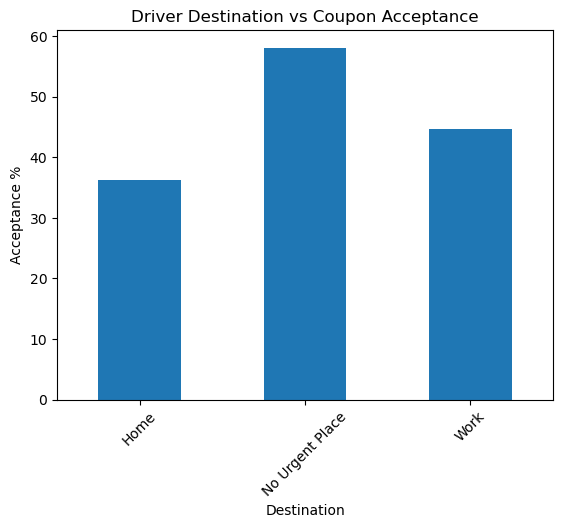

In [228]:
coffee_data.groupby('destination')['Y'].mean().mul(100).plot(kind='bar', rot=45)
plt.title('Driver Destination vs Coupon Acceptance')
plt.ylabel('Acceptance %')
plt.xlabel('Destination')
plt.savefig('images/destination_vs_coffee_coupon_acceptance.png', bbox_inches='tight')
plt.show()

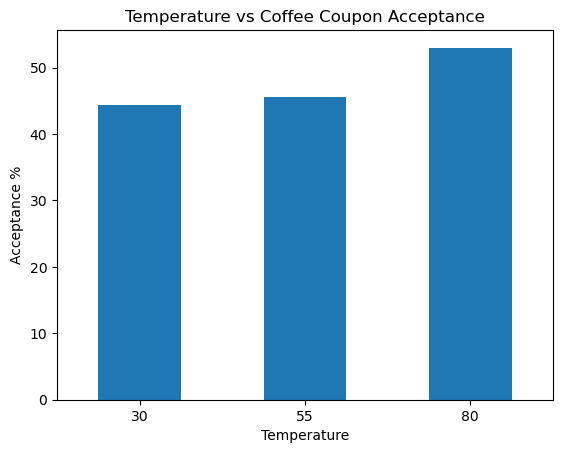

In [213]:
coffee_data.groupby('temperature')['Y'].mean().mul(100).plot(kind='bar', rot=0)
plt.title('Temperature vs Coffee Coupon Acceptance')
plt.ylabel('Acceptance %')
plt.xlabel('Temperature')
plt.savefig('images/temperature_vs_coffee_coupon_acceptance.png', bbox_inches='tight')
plt.show()

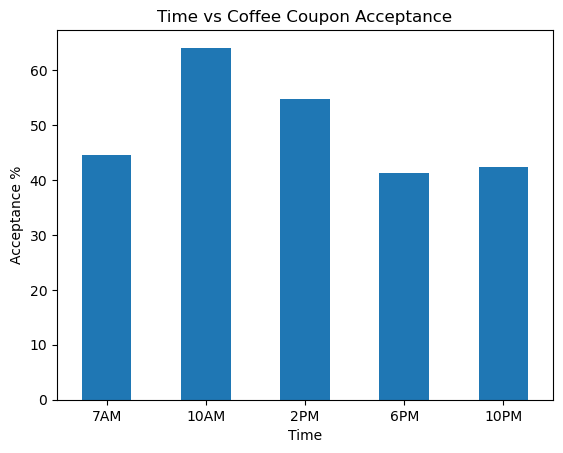

In [212]:
order = [ '7AM', '10AM', '2PM', '6PM', '10PM' ]
coffee_data.groupby('time')['Y'].mean().mul(100).reindex(order).plot(kind='bar', rot=0)
plt.title('Time vs Coffee Coupon Acceptance')
plt.ylabel('Acceptance %')
plt.xlabel('Time')
plt.savefig('images/time_vs_coffee_coupon_acceptance.png', bbox_inches='tight')
plt.show()

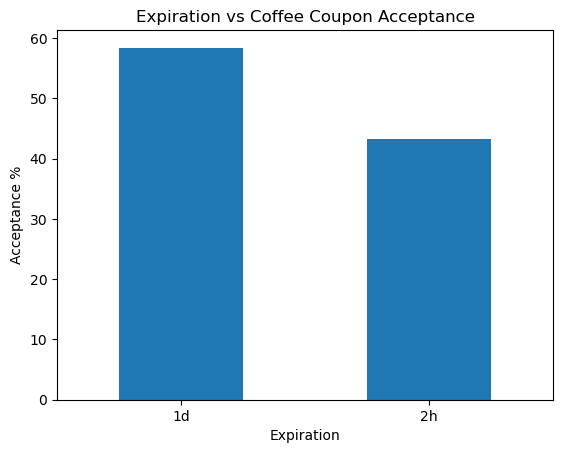

In [227]:
coffee_data.groupby('expiration')['Y'].mean().mul(100).plot(kind='bar', rot=0)
plt.title('Expiration vs Coffee Coupon Acceptance')
plt.ylabel('Acceptance %')
plt.xlabel('Expiration')
plt.savefig('images/expiration_vs_coffee_coupon_acceptance.png', bbox_inches='tight')
plt.show()

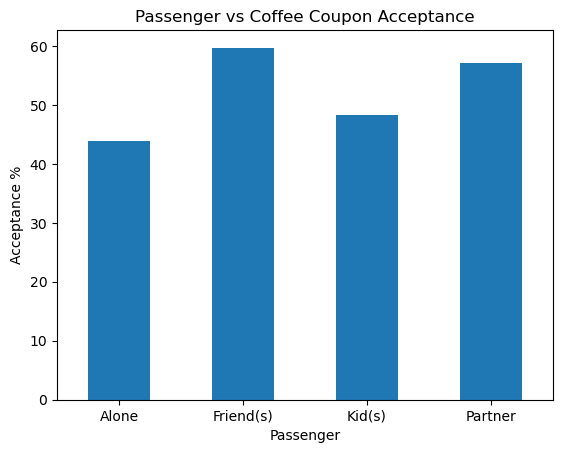

In [217]:
coffee_data.groupby('passenger')['Y'].mean().mul(100).plot(kind='bar', rot=0)
plt.title('Passenger vs Coffee Coupon Acceptance')
plt.ylabel('Acceptance %')
plt.xlabel('Passenger')
plt.savefig('images/passenger_vs_coffee_coupon_acceptance.png', bbox_inches='tight')
plt.show()

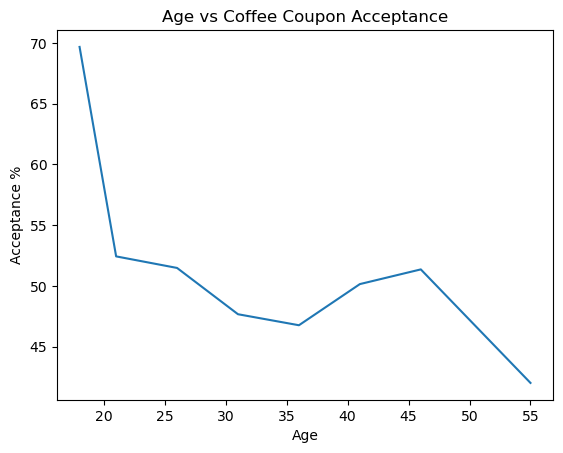

In [225]:
coffee_data.groupby('age')['Y'].mean().mul(100).plot(kind='line', rot=0)
plt.title('Age vs Coffee Coupon Acceptance')
plt.ylabel('Acceptance %')
plt.xlabel('Age')
plt.savefig('images/age_vs_coffee_coupon_acceptance.png', bbox_inches='tight')
plt.show()

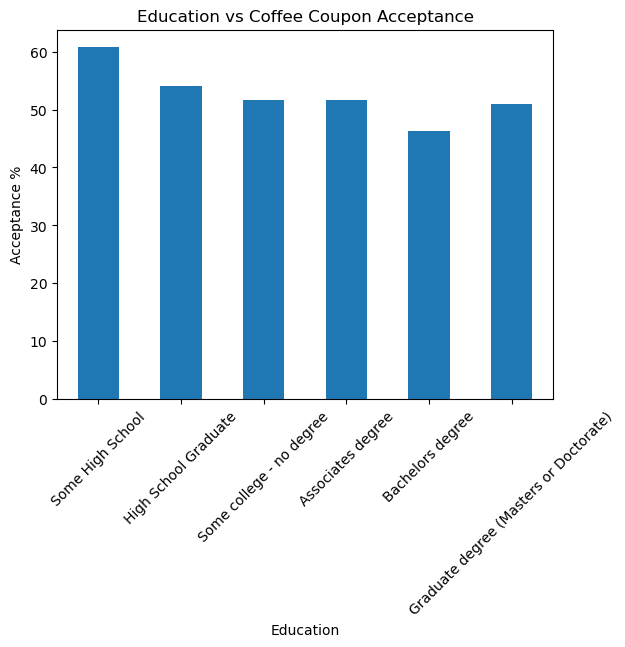

In [226]:
order = [ 'Some High School', 'High School Graduate', 'Some college - no degree', 'Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)' ]
coffee_data.groupby('education')['Y'].mean().mul(100).reindex(order).plot(kind='bar', rot=45)
plt.title('Education vs Coffee Coupon Acceptance')
plt.ylabel('Acceptance %')
plt.xlabel('Education')
plt.savefig('images/education_vs_coffee_coupon_acceptance.png', bbox_inches='tight')
plt.show()

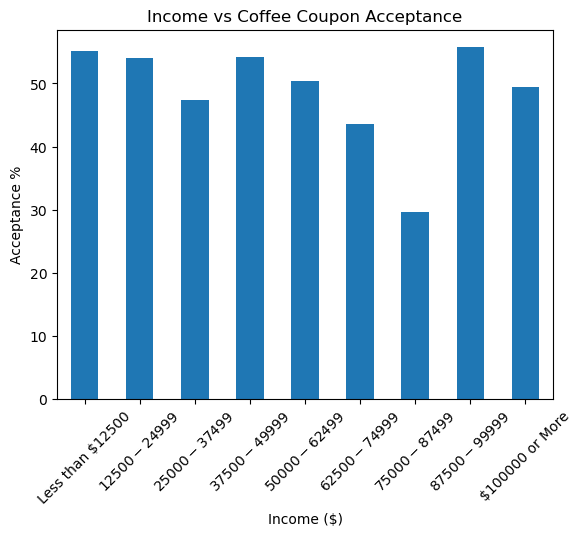

In [200]:
order = [ 'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More' ]
coffee_data.groupby('income')['Y'].mean().mul(100).reindex(order).plot(kind='bar', rot=45)
plt.title('Income vs Coffee Coupon Acceptance')
plt.ylabel('Acceptance %')
plt.xlabel('Income ($)')
plt.savefig('images/income_vs_coffee_coupon_acceptance.png', bbox_inches='tight')
plt.show()

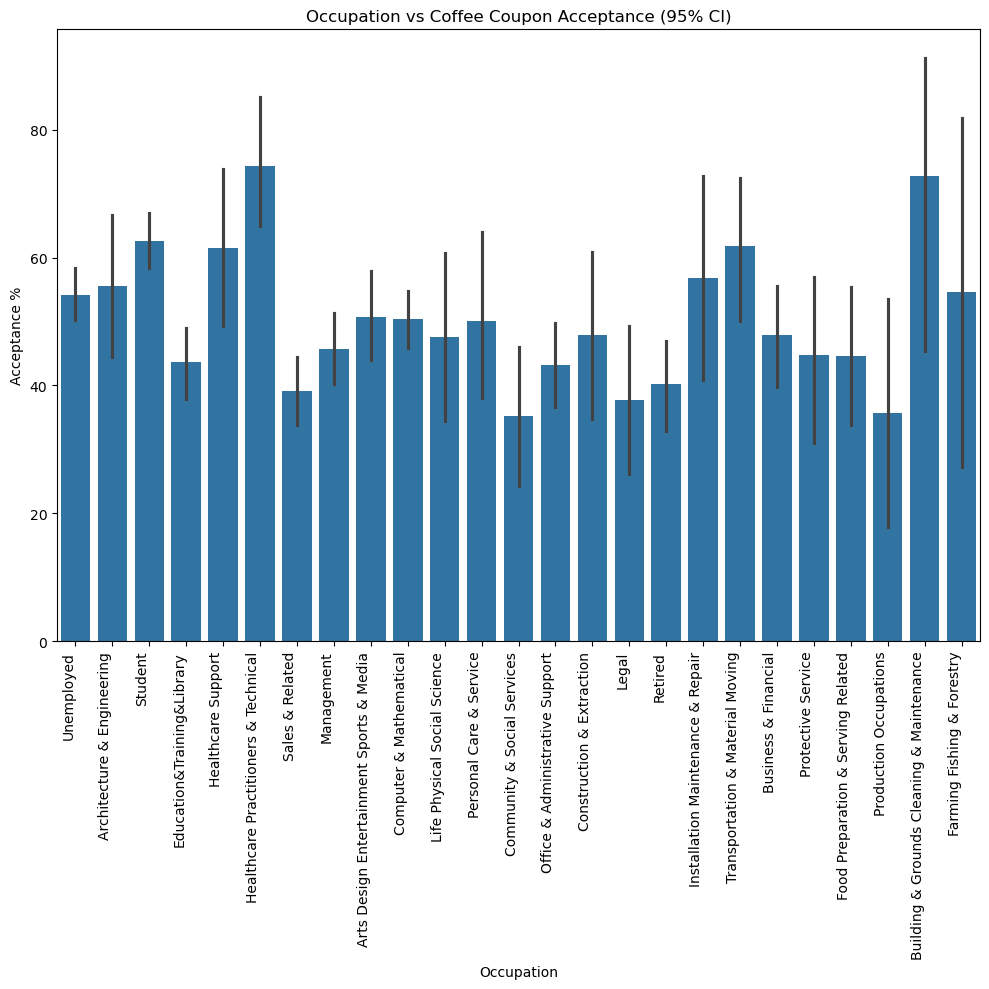

In [223]:
by_occ = (coffee_data.groupby('occupation', as_index=False).agg(acceptance_pct=('Y', lambda x: x.mean() * 100)))
plt.figure(figsize=(10, 10))
sns.barplot(data=coffee_data, x='occupation', y='Y', estimator=lambda x: x.mean() * 100, errorbar='ci')
plt.title('Occupation vs Coffee Coupon Acceptance (95% CI)')
plt.ylabel('Acceptance %')
plt.xlabel('Occupation')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('images/occupation_vs_coffee_coupon_acceptance.png', bbox_inches='tight')
plt.show()

### Coffee House Coupon Analysis & Conclusions

Analysis of the data regarding coffee house coupons offered to drivers revealed certain driver demographics, tendencies and trends. Coffee house coupons were much more likely to be accepted by very young drivers (those aged 21 and below) and those in specific occupations (Art/Media/Entertainment and Healthcare). As expected, drivers that were already frequently attending coffee shops at least 1 or more times per month were much more likely to accept coupons. Drivers were highly likely to accept coffee house coupons when they didn't have an urgent destination, were with a friend or partner, or were driving during higher outdoor temperatures. They were also more likely to accept coupons during mid morning or early after noon time frames- 10AM to 2PM. Driver's eduation level shows correlation to acceptance rates, as these were observed to be inversely correlated (less education completion was correlated with higher acceptance rates). Driver income largely was not correlated with acceptance rates, neither was marital status. Coupon expiration also impacted driver's willingness to accept, as coupons with more time till expiration dramatically increased acceptance rates.